### Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from matplotlib import pyplot

warnings.filterwarnings('ignore')

In [2]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
# check version number
import imblearn
print(imblearn.__version__)

0.10.1


In [6]:
table = "cleaned_BRFSS.csv"
df = pd.read_csv(table)

df.shape

(233149, 26)

In [7]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Race,Depression,EmploymentStatus
0,0.0,0.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,1.0,...,10.0,20.0,0.0,0.0,11.0,4.0,5.0,1.0,0.0,7.0
1,1.0,1.0,0.0,1.0,28.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,11.0,4.0,3.0,2.0,0.0,7.0
2,1.0,1.0,1.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,10.0,0.0,0.0,0.0,9.0,4.0,7.0,1.0,0.0,7.0
3,1.0,0.0,1.0,1.0,29.0,0.0,1.0,1.0,1.0,1.0,...,0.0,30.0,1.0,1.0,12.0,3.0,4.0,6.0,0.0,8.0
4,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,13.0,5.0,6.0,1.0,0.0,7.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes,233149.0,0.167129,0.373092,0.0,0.0,0.0,0.0,1.0
HighBP,233149.0,0.419534,0.493484,0.0,0.0,0.0,1.0,1.0
HighChol,233149.0,0.403043,0.490510,0.0,0.0,0.0,1.0,1.0
CholCheck,233149.0,0.962861,0.189104,0.0,1.0,1.0,1.0,1.0
BMI,233149.0,28.943397,6.542591,12.0,24.0,28.0,32.0,99.0
Smoker,233149.0,0.122531,0.327899,0.0,0.0,0.0,0.0,1.0
Stroke,233149.0,0.039035,0.193679,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,233149.0,0.086979,0.281804,0.0,0.0,0.0,0.0,1.0
PhysActivity,233149.0,0.779386,0.414662,0.0,1.0,1.0,1.0,1.0
Fruits,233149.0,0.621071,0.485122,0.0,0.0,1.0,1.0,1.0


In [9]:
cor_brfss=df.corr()
cor_brfss.style.background_gradient(cmap='coolwarm')

,Diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,HealthPlan,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Race,Depression,EmploymentStatus
Diabetes,1.000000,0.265886,0.208427,0.073387,0.214671,0.008045,0.099004,0.171493,-0.148783,-0.030514,-0.046921,-0.058068,0.024017,0.018930,0.286083,0.041157,0.160702,0.213427,0.027789,0.196436,-0.109678,-0.161991,0.035684,0.053953,0.183188
HighBP,0.265886,1.000000,0.283488,0.100552,0.214993,0.012425,0.126542,0.203228,-0.132551,-0.031504,-0.035792,-0.003491,0.050025,-0.007391,0.282214,0.011700,0.140518,0.208241,0.065833,0.344984,-0.106418,-0.150390,-0.042906,0.034711,0.255772
HighChol,0.208427,0.283488,1.000000,0.100062,0.087951,0.003037,0.086093,0.170435,-0.076740,-0.024106,-0.031355,-0.013802,0.056751,-0.012485,0.187098,0.019932,0.104378,0.127011,0.027026,0.288014,-0.034935,-0.067841,-0.052076,0.068840,0.203728
CholCheck,0.073387,0.100552,0.100062,1.000000,0.037256,-0.057551,0.025647,0.044762,-0.007948,0.025380,0.018018,-0.029574,0.154364,-0.070211,0.042866,-0.015018,0.031660,0.045167,-0.048641,0.105648,0.030875,0.022227,-0.010816,0.019503,0.073331
BMI,0.214671,0.214993,0.087951,0.037256,1.000000,-0.020629,0.010443,0.040282,-0.164321,-0.090150,-0.048076,-0.033036,-0.008556,0.047551,0.255009,0.088004,0.121036,0.199902,0.009268,-0.048711,-0.098517,-0.101836,0.029483,0.113967,-0.015523
Smoker,0.008045,0.012425,0.003037,-0.057551,-0.020629,1.000000,0.039904,0.035008,-0.106134,-0.091588,-0.040637,0.086020,-0.079588,0.101382,0.140566,0.130664,0.099080,0.090676,0.000985,-0.062150,-0.185540,-0.190109,0.017893,0.109766,0.012674
Stroke,0.099004,0.126542,0.086093,0.025647,0.010443,0.039904,1.000000,0.177398,-0.078677,-0.000473,-0.024557,-0.013779,0.015390,0.022566,0.160217,0.045477,0.132735,0.162470,0.000376,0.128568,-0.061589,-0.115226,-0.006420,0.045061,0.148582
HeartDiseaseorAttack,0.171493,0.203228,0.170435,0.044762,0.040282,0.035008,0.177398,1.000000,-0.098229,-0.006955,-0.024483,-0.028076,0.025036,0.014677,0.239920,0.034585,0.170096,0.193605,0.084425,0.223102,-0.080852,-0.124623,-0.026656,0.035519,0.204767
PhysActivity,-0.148783,-0.132551,-0.076740,-0.007948,-0.164321,-0.106134,-0.078677,-0.098229,1.000000,0.117897,0.136114,0.014314,0.024533,-0.049968,-0.284586,-0.116763,-0.248891,-0.284730,0.059738,-0.119862,0.211597,0.239899,-0.036877,-0.093462,-0.142649
Fruits,-0.030514,-0.031504,-0.024106,0.025380,-0.090150,-0.091588,-0.000473,-0.006955,0.117897,1.000000,0.216172,-0.042458,0.019712,-0.029330,-0.082611,-0.058360,-0.032901,-0.029809,-0.053979,0.072612,0.087422,0.053447,-0.008208,-0.051200,0.037426


In [57]:
# importing the required libraries for model building

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import fbeta_score

### Odds Ratio Calculations

In [58]:
dummy_variables = df.columns.values.tolist()

# Target Column

y = df['Diabetes']

drop_names = ['Diabetes']

for i in range(len(drop_names)):
    dummy_variables.remove(drop_names[i])

print(dummy_variables)

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HealthPlan', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income', 'Race', 'Depression', 'EmploymentStatus']


In [59]:
odds_df = df[dummy_variables]

odds_df = pd.get_dummies(odds_df, columns = ['Race','Age', 'GenHlth','Income', 'Education', 'EmploymentStatus'])

# odds_df = odds_df[['Age','Education','Income']].astype(str)

# odds_df = pd.get_dummies(df[continuous_variables], columns = ['Age','Education','Income','Race'] )

odds_dummy_variables = odds_df.columns.values.tolist()
odds_df.columns


Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'HealthPlan', 'NoDocbcCost', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Depression', 'Race_1.0', 'Race_2.0',
       'Race_3.0', 'Race_4.0', 'Race_5.0', 'Race_6.0', 'Age_1.0', 'Age_2.0',
       'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0', 'Age_8.0',
       'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0',
       'GenHlth_1.0', 'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0',
       'GenHlth_5.0', 'Income_1.0', 'Income_2.0', 'Income_3.0', 'Income_4.0',
       'Income_5.0', 'Income_6.0', 'Income_7.0', 'Income_8.0', 'Income_9.0',
       'Income_10.0', 'Income_11.0', 'Education_1.0', 'Education_2.0',
       'Education_3.0', 'Education_4.0', 'Education_5.0', 'Education_6.0',
       'EmploymentStatus_1.0', 'EmploymentStatus_2.0', 'EmploymentStatus_3.0',
       'EmploymentStatus_4.0', 'EmploymentStatus_5.0', 

In [60]:
# Remove Reference Category

remove_columns = ['Age_1.0', 'GenHlth_1.0','Education_6.0', 'Race_1.0', 'Income_11.0','EmploymentStatus_1.0']

odds_df = odds_df.drop(remove_columns, axis = 1)

odds_df.columns

odds_dummy_variables = odds_df.columns.values.tolist()

print(odds_dummy_variables )

['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HealthPlan', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Depression', 'Race_2.0', 'Race_3.0', 'Race_4.0', 'Race_5.0', 'Race_6.0', 'Age_2.0', 'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0', 'Age_8.0', 'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0', 'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0', 'Income_1.0', 'Income_2.0', 'Income_3.0', 'Income_4.0', 'Income_5.0', 'Income_6.0', 'Income_7.0', 'Income_8.0', 'Income_9.0', 'Income_10.0', 'Education_1.0', 'Education_2.0', 'Education_3.0', 'Education_4.0', 'Education_5.0', 'EmploymentStatus_2.0', 'EmploymentStatus_3.0', 'EmploymentStatus_4.0', 'EmploymentStatus_5.0', 'EmploymentStatus_6.0', 'EmploymentStatus_7.0', 'EmploymentStatus_8.0']


In [61]:
#  statsmodels logistic regression
import statsmodels.api as sm

logreg = sm.Logit(y, sm.add_constant(odds_df[odds_dummy_variables])).fit_regularized() #  sm.add_constant(X_ass), method='bfgs'
#print(logreg.params)
print(logreg.summary())

#  calculating odds ratios and displaying in dataframe

pd.set_option('display.float_format', lambda x: '%0.4f' % x)  # suppress scientific notation

coefs = pd.DataFrame({
    'coef': logreg.params.values,
    'odds ratio': np.exp(logreg.params.values),
     'p-values': logreg.pvalues
})
coefs
coefs.to_csv('odds_ratios.csv')

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.35861667211295967
            Iterations: 375
            Function evaluations: 381
            Gradient evaluations: 375
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:               233149
Model:                          Logit   Df Residuals:                   233087
Method:                           MLE   Df Model:                           61
Date:                Thu, 11 May 2023   Pseudo R-squ.:                  0.2054
Time:                        08:12:00   Log-Likelihood:                -83611.
converged:                       True   LL-Null:                   -1.0522e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [62]:
coefs

,coef,odds ratio,p-values
const,-8.3645,0.0002,0.0000
HighBP,0.6205,1.8599,0.0000
HighChol,0.5576,1.7464,0.0000
CholCheck,1.3176,3.7346,0.0000
BMI,0.0584,1.0601,0.0000
...,...,...,...
EmploymentStatus_4.0,-0.0075,0.9926,0.8810
EmploymentStatus_5.0,0.1022,1.1076,0.0073
EmploymentStatus_6.0,-0.1047,0.9006,0.3075
EmploymentStatus_7.0,0.0473,1.0484,0.0199


### Train-Test Split - with SMOTE Oversampling (AROC)

In [63]:
# Target Column

y = df['Diabetes']

# Our selected features, here we drop the unwanted columns

X = df.drop('Diabetes', axis = 1)

In [64]:
# Split Data into 80/20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y)

print('No. of train instances:', len(X_train))
print('No. of test instances:', len(X_test))

No. of train instances: 163204
No. of test instances: 69945


In [65]:
# summarize class distribution
from collections import Counter

counter = Counter(y_train)
print(counter)

Counter({0.0: 135928, 1.0: 27276})


In [66]:
# under and oversampling of data using SMOTE

oversampling_strat = 0.65

undersampling_strat = 0.9

In [67]:
X_train_cv = X_train

y_train_cv = y_train

#### Cross Validation of Training Set

#### Logistic Regression

In [68]:
#LR evaluated on imbalanced dataset with SMOTE oversampling

# define pipeline
steps = [('o', SMOTE(sampling_strategy=oversampling_strat)), 
         ('u', RandomUnderSampler(sampling_strategy=undersampling_strat)), 
         ('model', LogisticRegression(solver='newton-cholesky', C=10**3, penalty = 'l2', random_state=22))]

pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
scores_LR = cross_val_score(pipeline, X_train_cv, y_train_cv, scoring='roc_auc', cv=cv, n_jobs=-1)
score_LR =  mean(scores_LR)

score_LR

print('AROC Mean: %.3f (%.3f)' % (score_LR, std(scores_LR)))

AROC Mean: 0.807 (0.004)


#### Decision Tree

In [69]:
#decision tree evaluated on imbalanced dataset with SMOTE oversampling

# define pipeline
steps = [('o', SMOTE(sampling_strategy=oversampling_strat)), 
         ('u', RandomUnderSampler(sampling_strategy=undersampling_strat)), 
         ('model', DecisionTreeClassifier(criterion = "log_loss", max_depth=10))]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
scores_DT = cross_val_score(pipeline, X_train_cv, y_train_cv, scoring='roc_auc', cv=cv, n_jobs=-1)
score_DT =  mean(scores_DT)

print('AROC Mean: %.3f (%.3f)' % (score_DT, std(scores_DT)))

AROC Mean: 0.792 (0.004)


#### Random Forest

In [70]:
# Random Forest evaluated on imbalanced dataset with SMOTE oversampling
N = 250 # setting number of trees used in random forest
model = RandomForestClassifier(n_estimators=N, max_depth=10, random_state=22, min_samples_split=3, max_leaf_nodes=5)

# define pipeline
steps = [('o', SMOTE(sampling_strategy=oversampling_strat)), 
         ('u', RandomUnderSampler(sampling_strategy=undersampling_strat)), 
         ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
scores_RF = cross_val_score(pipeline, X_train_cv, y_train_cv, scoring='roc_auc', cv=cv, n_jobs=-1)
score_RF =  mean(scores_RF)

print('AROC Mean: %.3f (%.3f)' % (score_RF, std(scores_RF)))

AROC Mean: 0.789 (0.004)


#### XG Boost

In [71]:
# XGB model evaluated on imbalanced dataset with SMOTE oversampling
N = 250
model = XGBClassifier(n_estimators = 250, max_depth=2, learning_rate = 0.03)

# define pipeline
steps = [('o', SMOTE(sampling_strategy=oversampling_strat)), 
         ('u', RandomUnderSampler(sampling_strategy=undersampling_strat)), 
         ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
scores_xgb = cross_val_score(pipeline, X_train_cv, y_train_cv, scoring='roc_auc', cv=cv, n_jobs=-1)
score_xgb =  mean(scores_xgb)

print('AROC Mean: %.3f (%.3f)' % (score_xgb, std(scores_xgb)))

AROC Mean: 0.806 (0.004)


#### Collating Results

In [72]:
results = [scores_LR, scores_DT, scores_RF, scores_xgb]

bp_labels = ['Logistic Regression','Decision Tree','Random Forest', "XGB"]

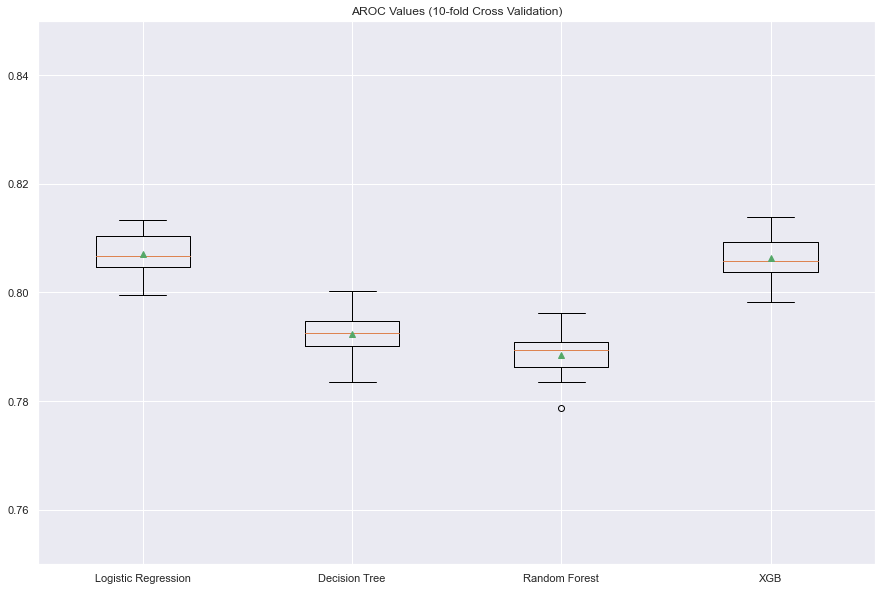

<Figure size 1080x720 with 0 Axes>

In [73]:
pyplot.boxplot(results, labels= bp_labels, showmeans=True)

plt.ylim(0.75, 0.85)

plt.title("AROC Values (10-fold Cross Validation)")

plt.show()

plt.savefig('AROC_Values.png')

In [74]:
results_data = {'Logistic Regression': [score_LR, std(scores_LR)], 
       'Decision Tree': [score_DT, std(scores_DT)],
       'Random Forest' : [score_RF, std(scores_RF)],
       'XGB': [score_xgb, std(scores_xgb)]}

results_comp = pd.DataFrame(results_data)
results_comp = results_comp.rename(index = {0 : 'AROC',
                                  1 : 'Standard Deviation'                                  
})

results_comp = results_comp.sort_values(by = 'AROC', axis = 1, ascending = False)

results_comp_T = results_comp.transpose()
        
results_comp_T

,AROC,Standard Deviation
Logistic Regression,0.8071,0.0038
XGB,0.8064,0.0039
Decision Tree,0.7923,0.0039
Random Forest,0.7886,0.0040


In [75]:
results_comp_T.to_csv('AROC_results.csv')

### Building and Testing Models

In [76]:
from imblearn.pipeline import Pipeline 
from imblearn.under_sampling import RandomUnderSampler

counter = Counter(y_train)
print(counter) 

over = SMOTE(sampling_strategy=oversampling_strat)
under = RandomUnderSampler(sampling_strategy=undersampling_strat)

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train)
print(counter)

Counter({0.0: 135928, 1.0: 27276})
Counter({0.0: 98170, 1.0: 88353})


#### Logistic Regression

In [77]:
# import the classifier
classifier = LogisticRegression(solver= 'newton-cholesky', C=10**3, penalty = 'l2', random_state=22)

# fit our training data to our logistic regression model that we have made 
LR = classifier.fit(X_train, y_train)

# Use the classifier to predict 
y_pred_LR = LR.predict(X_test)

# Creating metrics that will be output below 

LR_train_score = LR.score(X_train,y_train)

LR_auc = metrics.roc_auc_score(y_test, y_pred_LR)
print('\nAROC: ', LR_auc)

LR_f1 = metrics.f1_score(y_test, y_pred_LR, average=None)
print('\nF1 Score: ', LR_f1)

LR_fbeta = metrics.fbeta_score(y_test, y_pred_LR, beta=2)
print('\nFbeta Score: ', LR_fbeta)

acc_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("\nLogistic Regression Accuracy:", acc_LR, "\n")

df_LR = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_LR})
df_LR['Predicted'] = df_LR['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_LR = df_LR.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_LR['Result'] = results 
df_LR = df_LR[["Result","Actual","Predicted","Count"]]
df_LR.head()


AROC:  0.7283009810779265

F1 Score:  [0.82389907 0.47591166]

Fbeta Score:  0.5958464407213927

Logistic Regression Accuracy: 0.7363785831724927 



,Result,Actual,Predicted,Count
0,True Negative,0.0000,0,43134
1,False Positive,0.0000,1,15121
2,False Negative,1.0000,0,3318
3,True Positive,1.0000,1,8372


In [78]:
LR_train_score

0.7395549074376887

#### Decision Tree

In [79]:
# import the classifier
classifier = DecisionTreeClassifier(criterion = "log_loss", max_depth=10)

# fit our training data to the decision tree classifier  
D_tree = classifier.fit(X_train, y_train)

# Use the classifier to predict 

y_pred_dtree = D_tree.predict(X_test)

# Creating metrics that will be output below 

dtree_auc = metrics.roc_auc_score(y_test, y_pred_dtree)
print('\nAROC: ', dtree_auc)

dtree_f1 = metrics.f1_score(y_test, y_pred_dtree, average=None)
print('\nF1 Score: ', dtree_f1)

dtree_fbeta = metrics.fbeta_score(y_test, y_pred_dtree, beta=2)
print('\nFbeta Score: ', dtree_fbeta)

acc_dtree = metrics.accuracy_score(y_test, y_pred_dtree)
print("\nDT Accuracy:", acc_dtree, "\n")

df_dtree = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_dtree})
df_dtree['Predicted'] = df_dtree['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_dtree = df_dtree.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_dtree['Result'] = results 
df_dtree = df_dtree[["Result","Actual","Predicted","Count"]]
df_dtree.head()


AROC:  0.6972942658890563

F1 Score:  [0.86280148 0.46626582]

Fbeta Score:  0.5236666876060054

DT Accuracy: 0.7817142040174423 



,Result,Actual,Predicted,Count
0,True Negative,0.0000,0,48008
1,False Positive,0.0000,1,10247
2,False Negative,1.0000,0,5021
3,True Positive,1.0000,1,6669


#### Random Forest

In [80]:
# import the classifier
N = 250
model = RandomForestClassifier(n_estimators=N, max_depth=10, random_state=22, min_samples_split=3, max_leaf_nodes=5)

# fit our training data to the decision tree classifier
model.fit(X_train, y_train)

# Use the classifier to predict 
y_pred_rfc = model.predict(X_test)

# Creating metrics that will be output below 

rfc_auc = metrics.roc_auc_score(y_test, y_pred_rfc)
print('\nAROC: ', rfc_auc)

rfc_f1 = metrics.f1_score(y_test, y_pred_rfc, average=None)
print('\nF1 Score: ', rfc_f1)

rfc_fbeta = metrics.fbeta_score(y_test, y_pred_rfc, beta=2)
print('\nFbeta Score: ', rfc_fbeta)

acc_rfc = metrics.accuracy_score(y_test, y_pred_rfc)
print("\nRF Accuracy:", acc_rfc, "\n")

df_rfc = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_rfc})
df_rfc['Predicted'] = df_rfc['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_rfc = df_rfc.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_rfc['Result'] = results 
df_rfc = df_rfc[["Result","Actual","Predicted","Count"]]
df_rfc.head()


AROC:  0.7030320735969604

F1 Score:  [0.8553426  0.46799973]

Fbeta Score:  0.5385065254863334

RF Accuracy: 0.7725355636571591 



,Result,Actual,Predicted,Count
0,True Negative,0.0000,0,47037
1,False Positive,0.0000,1,11218
2,False Negative,1.0000,0,4692
3,True Positive,1.0000,1,6998


In [81]:
feat_imp_data = {}

importances = model.feature_importances_

feat_labels = df.columns[1:]

sorted_indices = np.argsort(importances)[::-1]


 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))
    
    feat_imp_data[f] = [feat_labels[sorted_indices[f]],importances[sorted_indices[f]]]

 1) HighBP                         0.269111
 2) HighChol                       0.185688
 3) GenHlth                        0.175176
 4) DiffWalk                       0.082915
 5) PhysActivity                   0.068218
 6) Age                            0.059075
 7) HeartDiseaseorAttack           0.042523
 8) BMI                            0.041908
 9) EmploymentStatus               0.021713
10) Education                      0.018095
11) PhysHlth                       0.010316
12) Income                         0.008999
13) Sex                            0.006307
14) HvyAlcoholConsump              0.004401
15) Stroke                         0.001849
16) Race                           0.001192
17) CholCheck                      0.001011
18) Depression                     0.001010
19) Smoker                         0.000372
20) Fruits                         0.000118
21) MentHlth                       0.000000
22) NoDocbcCost                    0.000000
23) Veggies                     

In [82]:
feat_imp_data

# collating the figures calculated above into a dataframe

df_feat_imp = pd.DataFrame(feat_imp_data)

df_feat_imp = df_feat_imp.transpose()

df_feat_imp.to_csv("feature_importance.csv")

df_feat_imp

,0,1
0,HighBP,0.2691
1,HighChol,0.1857
2,GenHlth,0.1752
3,DiffWalk,0.0829
4,PhysActivity,0.0682
5,Age,0.0591
6,HeartDiseaseorAttack,0.0425
7,BMI,0.0419
8,EmploymentStatus,0.0217
9,Education,0.0181


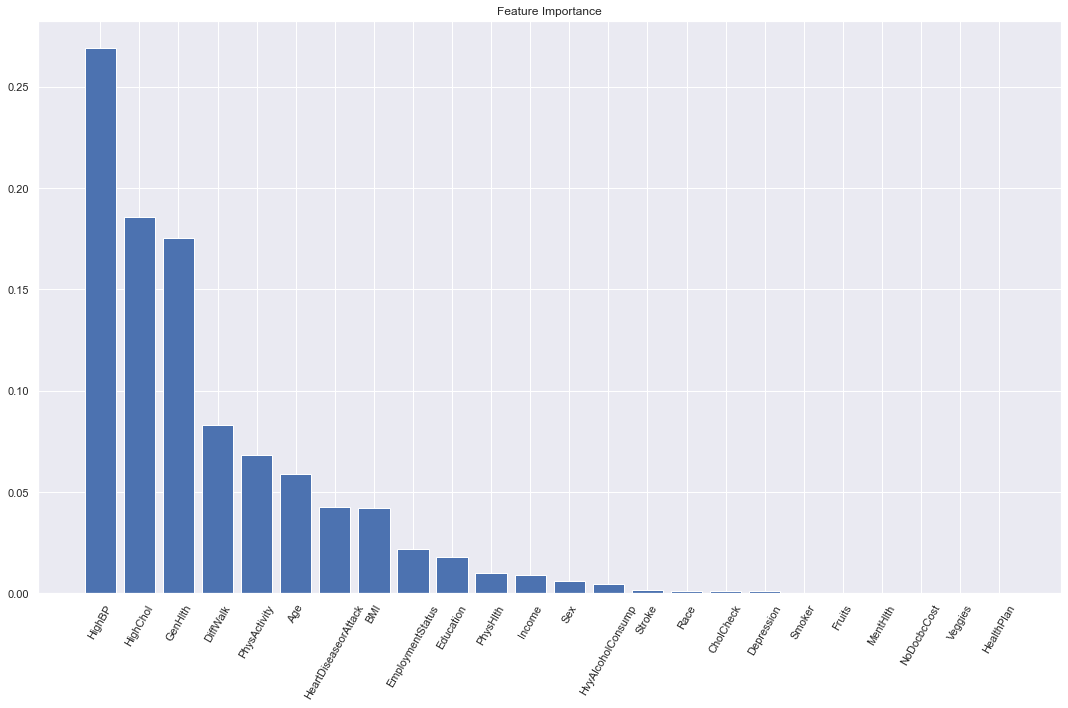

In [83]:
sns.set(rc={"figure.figsize":(15, 10)})
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=60)
plt.tight_layout()
plt.show()

#### XGB (Gradient Boosting)

In [84]:
# import the classifier
xgb = XGBClassifier(n_estimators = 250, max_depth=2, learning_rate = 0.03, eval_metric = 'auc')

# fit our training data to the XGBoost classifier
xgb.fit(X_train, y_train)

# Use the classifier to predict 
y_pred_XGB = xgb.predict(X_test)

# Creating metrics that will be output below 

XGB_auc = metrics.roc_auc_score(y_test, y_pred_XGB)
print('\nAROC: ', XGB_auc)

XGB_f1 = metrics.f1_score(y_test, y_pred_XGB, average=None)
print('\nF1 Score: ', XGB_f1)

XGB_fbeta = metrics.fbeta_score(y_test, y_pred_XGB, beta=2)
print('\nFbeta Score: ', XGB_fbeta)

acc_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("\nXGBoost Accuracy:", acc_XGB, '\n')

df_XGB = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred_XGB})
df_XGB['Predicted'] = df_XGB['Predicted'].astype(int)
results = ["True Negative","False Positive","False Negative","True Positive"]

df_XGB = df_XGB.groupby(["Actual", "Predicted"]).size().reset_index(name="Count")
df_XGB['Result'] = results 
df_XGB = df_XGB[["Result","Actual","Predicted","Count"]]
df_XGB.head()


AROC:  0.6972958848295292

F1 Score:  [0.87850648 0.47737437]

Fbeta Score:  0.5123991148138505

XGBoost Accuracy: 0.8028450925727357 



,Result,Actual,Predicted,Count
0,True Negative,0.0000,0,49857
1,False Positive,0.0000,1,8398
2,False Negative,1.0000,0,5392
3,True Positive,1.0000,1,6298


#### Calculating Feature Importances

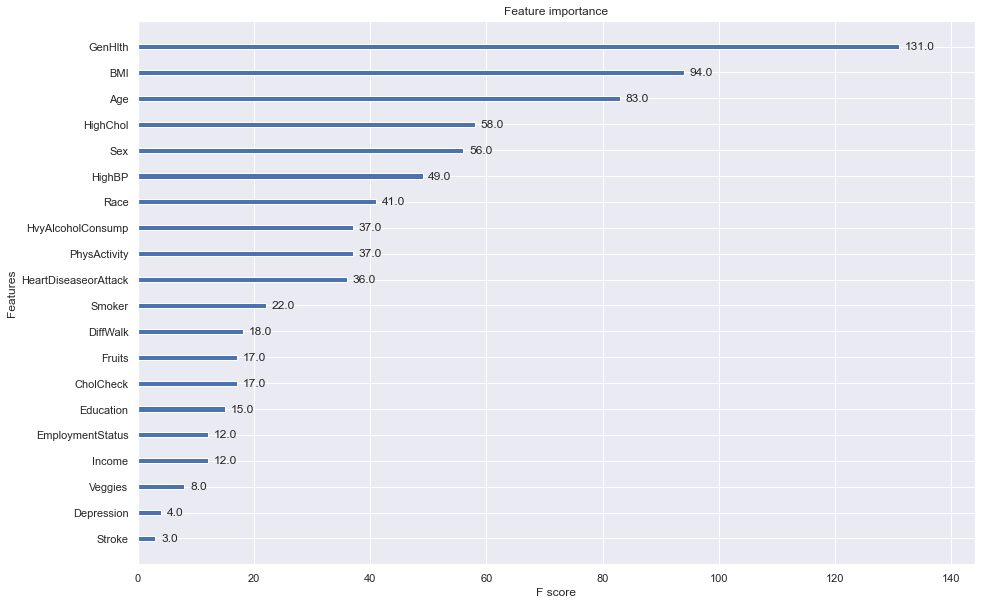

In [85]:
sns.set(rc={"figure.figsize":(15, 10)})
plot_importance(xgb)
pyplot.show()

### Collating Results

In [86]:
# Determine the number of incorrect classifications by adding the number of false postives to the number of false negatives for
# each model.

# converted to strings for aethetics

LR_wrong = (df_LR['Count'][1] + df_LR['Count'][2]).astype(str)
DT_wrong = (df_dtree['Count'][1] + df_dtree['Count'][2]).astype(str)
RFC_wrong = (df_rfc['Count'][1] + df_rfc['Count'][2]).astype(str)
XGB_wrong = (df_XGB['Count'][1] + df_XGB['Count'][2]).astype(str)


In [87]:
# Determine the number of incorrect classifications by adding the number of false postives to the number of false negatives for
# each model.

LR_FP = (df_LR['Count'][1])
DT_FP = (df_dtree['Count'][1])
RFC_FP = (df_rfc['Count'][1])
XGB_FP = (df_XGB['Count'][1])


LR_FN = (df_LR['Count'][2])
DT_FN = (df_dtree['Count'][2])
RFC_FN = (df_rfc['Count'][2])
XGB_FN = (df_XGB['Count'][2])


In [88]:
# Calculating the Recall of each model

LR_Recall = (df_LR['Count'][3]/(df_LR['Count'][2] + df_LR['Count'][3]))
DT_Recall = (df_dtree['Count'][3]/(df_dtree['Count'][2] + df_dtree['Count'][3]))
RFC_Recall = (df_rfc['Count'][3]/(df_rfc['Count'][2] + df_rfc['Count'][3]))
XGB_Recall = (df_XGB['Count'][3]/(df_XGB['Count'][2] + df_XGB['Count'][3]))


# Calculating the Precision of Each Model

LR_Pre = (df_LR['Count'][3]/(df_LR['Count'][1] + df_LR['Count'][3]))
DT_Pre = (df_dtree['Count'][3]/(df_dtree['Count'][1] + df_dtree['Count'][3]))
RFC_Pre = (df_rfc['Count'][3]/(df_rfc['Count'][1] + df_rfc['Count'][3]))
XGB_Pre = (df_XGB['Count'][3]/(df_XGB['Count'][1] + df_XGB['Count'][3]))


In [89]:
# Calculating the Specificity of each model

LR_Spec = (df_LR['Count'][0]/(df_LR['Count'][1] + df_LR['Count'][0]))
DT_Spec = (df_dtree['Count'][0]/(df_dtree['Count'][1] + df_dtree['Count'][0]))
RFC_Spec = (df_rfc['Count'][0]/(df_rfc['Count'][1] + df_rfc['Count'][0]))
XGB_Spec = (df_XGB['Count'][0]/(df_XGB['Count'][1] + df_XGB['Count'][0]))

# Calculating the F1 Score (Negative) of each model

LR_F1_Score_0 = LR_f1[0]
DT_F1_Score_0 = dtree_f1[0]
RFC_F1_Score_0 = rfc_f1[0]
XGB_F1_Score_0 = XGB_f1[0]

# Calculating the F1 Score (Negative) of each model

LR_F1_Score_1 = LR_f1[1]
DT_F1_Score_1 = dtree_f1[1]
RFC_F1_Score_1 = rfc_f1[1]
XGB_F1_Score_1 = XGB_f1[1]

# Calculating the F1 Score of each model

LR_F1_Score = 2*(LR_Recall*LR_Pre)/(LR_Recall+LR_Pre)
DT_F1_Score = 2*(DT_Recall*DT_Pre)/(DT_Recall+DT_Pre)
RFC_F1_Score = 2*(RFC_Recall*RFC_Pre)/(RFC_Recall+RFC_Pre)
XGB_F1_Score = 2*(XGB_Recall*XGB_Pre)/(XGB_Recall+XGB_Pre)

In [90]:
# collating the figures calculated above into a dataframe

data = {
    'Logistic Regression' : [acc_LR,LR_auc, score_LR, LR_FP, LR_FN, LR_Pre, LR_Recall,LR_Spec,LR_F1_Score_1, LR_fbeta],
    'Single Tree' : [acc_dtree,dtree_auc, score_DT, DT_FP, DT_FN, DT_Pre, DT_Recall,DT_Spec,DT_F1_Score_1, dtree_fbeta],
    'Random Forest' : [acc_rfc,rfc_auc, score_RF, RFC_FP, RFC_FN, RFC_Pre, RFC_Recall,RFC_Spec, RFC_F1_Score_1, rfc_fbeta],
    'XGBoost'  : [acc_XGB,XGB_auc, score_xgb, XGB_FP, XGB_FN, XGB_Pre, XGB_Recall,XGB_Spec,XGB_F1_Score_1, XGB_fbeta]
}

pd.set_option('display.float_format', lambda x: '%0.3f' % x)

df_comp = pd.DataFrame(data)
df_comp = df_comp.rename(index = {0 : 'Accuracy',
                                  1 : 'AROC (Test Set)',
                                  2 : 'AROC (K-Fold CV)',
                                  3 : 'False Positives',
                                  4 : 'False Negatives',
                                  5 : 'Precison',
                                  6 : 'Recall/Sensitivity',
                                  7 : 'Specificity',                               
                                  8 : 'F1 Score',
                                  9 : 'Fbeta Score'
})

df_comp
acc_df = df_comp.sort_values(by = 'Accuracy', axis = 1, ascending = False)
acc_T = acc_df.transpose()
acc_T.to_csv('model_results.csv')

acc_T

,Accuracy,AROC (Test Set),AROC (K-Fold CV),False Positives,False Negatives,Precison,Recall/Sensitivity,Specificity,F1 Score,Fbeta Score
XGBoost,0.803,0.697,0.806,8398.000,5392.000,0.429,0.539,0.856,0.477,0.512
Single Tree,0.782,0.697,0.792,10247.000,5021.000,0.394,0.570,0.824,0.466,0.524
Random Forest,0.773,0.703,0.789,11218.000,4692.000,0.384,0.599,0.807,0.468,0.539
Logistic Regression,0.736,0.728,0.807,15121.000,3318.000,0.356,0.716,0.740,0.476,0.596


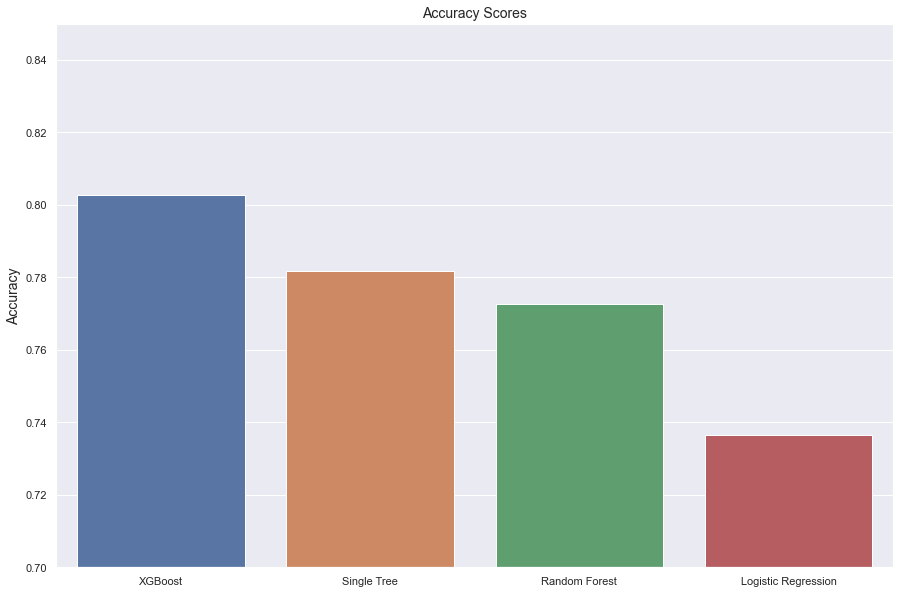

In [91]:
sns.set(rc={"figure.figsize":(15, 10)})
g = sns.barplot(data=acc_df.transpose(), x = acc_df.transpose().index.values, y= "Accuracy")
g.set(ylim=(0.7, 0.85))
plt.title('Accuracy Scores', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)

plt.show()

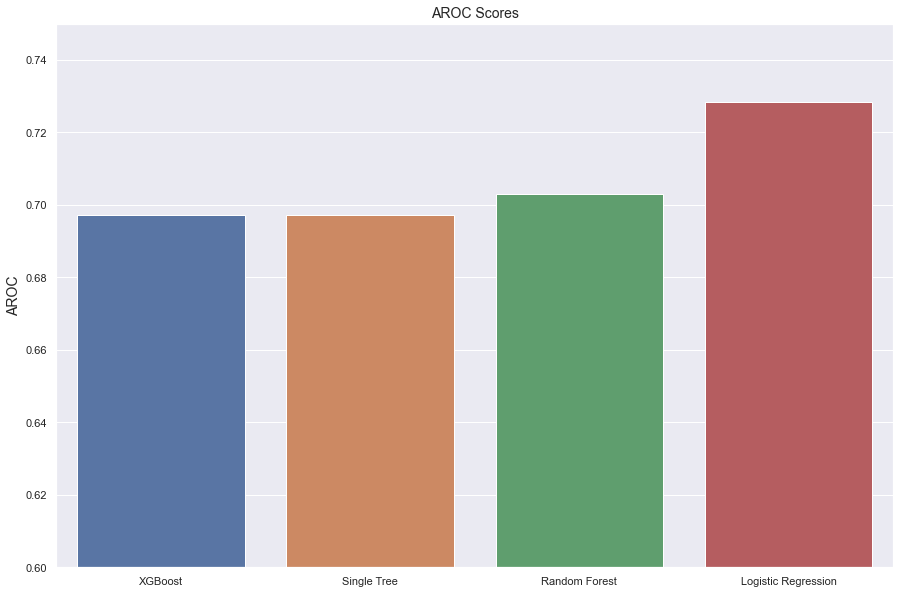

In [92]:
sns.set(rc={"figure.figsize":(15, 10)})
g = sns.barplot(data=acc_df.transpose(), x = acc_df.transpose().index.values, y= "AROC (Test Set)")
g.set(ylim=(0.6, 0.75))
plt.title('AROC Scores', fontsize = 14)
plt.ylabel('AROC', fontsize = 14)

plt.show()

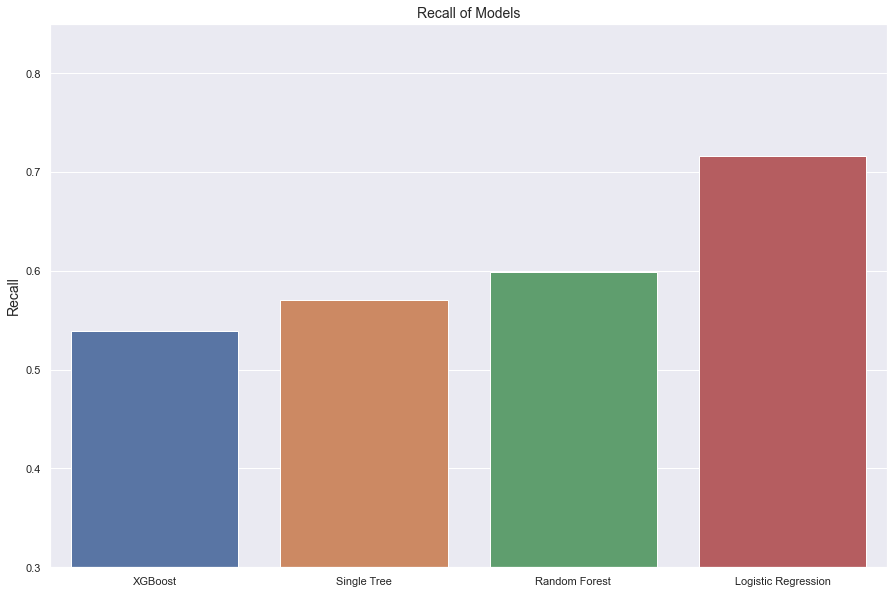

In [93]:
g = sns.barplot(data=acc_df.transpose(), x = acc_T.index.values, y= 'Recall/Sensitivity')
sns.set(rc={"figure.figsize":(15, 10)})
g.set(ylim=(0.3, 0.85))
plt.title('Recall of Models', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)

plt.show()

Text(0.5, 1.0, 'ROC Curve Plot')

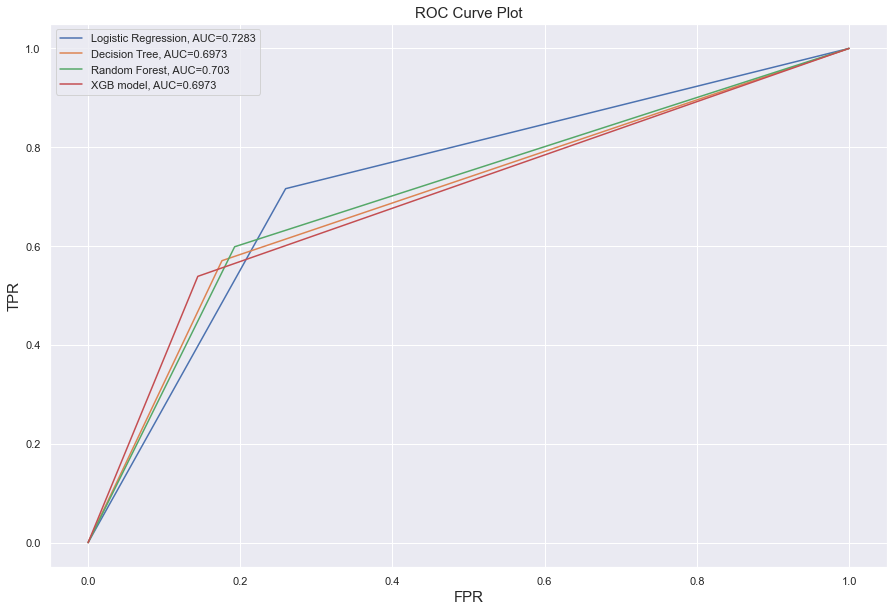

In [94]:
plt.figure(0).clf()

# Logistic Regression
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_LR)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(round(LR_auc,4)))

# Decision Tree
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_dtree)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(round(dtree_auc,4)))

# Random Forest
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_rfc)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(round(rfc_auc,4)))

# XGB 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_XGB)
plt.plot(fpr,tpr,label="XGB model, AUC="+str(round(XGB_auc,4)))

plt.legend()
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.title('ROC Curve Plot', fontsize=15)